In [1]:
# Nasan moottoridataa
# Data source:  "A. Saxena and K. Goebel (2008). "Turbofan Engine Degradation Simulation Data Set", 
# NASA Ames Prognostics Data Repository, NASA Ames, Moffett Field, CA." 
# Training data:     aircraft engine run-to-failure data.
# Testing data:      aircraft engine operating data without failure events recorded.
# Ground truth data: information of true remaining cycles for each engine in the testing data
##  8.2.18 / K5680  ##

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

# asetetaan näytettävien rivien maksimimäärä
pd.set_option('display.max_rows', 30)

# TRAINING DATASET
# asetetaan labelit sarakkeisiin
cols = ['unit', 'time', 'sett1', 'sett2', 'sett3']

for i in range(1,24):
    cols.append("sensor"+str(i))


# Lataa TRAINING DATASET, # set separator  ' '
data=pd.read_table('data/train_FD001.txt', sep=' ', names=cols)
# Lataa TESTING DATASET
test=pd.read_table('data/test_FD001.txt', sep=' ', names=cols)

/home/vesada/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data

,unit,time,sett1,sett2,sett3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774,NaN,NaN
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106,NaN,NaN
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066,NaN,NaN
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694,NaN,NaN


### Luodaan uusi sarake 'RUL' ja kunkin unitin jäljellä oleva elinikä joka riville


In [3]:
# ryhmittele data 'unit':in mukaan
grouped_by_unit = data.groupby(by=["unit"])

# hae maksimiarvot kutakin 'unit':ia kohti
maxit = grouped_by_unit.max(col="time")

# haetaan unittien määrä
number_of_units = maxit['time'].count()

# lisätään sarake 'RUL'
data['RUL'] = 0 


# Funktio palauttaa jäljelläolevan elinajan (RUL) / sykli / unit
def code(current_time_cycle, unitn):
    rul = maxit['time'][unitn] - current_time_cycle
    return rul

# Lasketaan 'RUL' -sarakkeeseen arvot
for unitnro in range(1,number_of_units+1): # aluksi tehty ilman +1:stä, viimeinen moottori jäi tällöin käsittelemättä
    # missä 'unit number' == i, niin 'RUL' on maxit['time(cycles)][i] - 'time(cycles)'
    data.loc[data['unit'] == unitnro, 'RUL'] = data.loc[data['unit'] == unitnro, 'time'].apply(code, unitn=unitnro)
    print('| ', unitnro, ' = ', maxit['time'][unitnro], end=' ')

data.head(1)

|  1  =  192 |  2  =  287 |  3  =  179 |  4  =  189 |  5  =  269 |  6  =  188 |  7  =  259 |  8  =  150 |  9  =  201 |  10  =  222 |  11  =  240 |  12  =  170 |  13  =  163 |  14  =  180 |  15  =  207 |  16  =  209 |  17  =  276 |  18  =  195 |  19  =  158 |  20  =  234 |  21  =  195 |  22  =  202 |  23  =  168 |  24  =  147 |  25  =  230 |  26  =  199 |  27  =  156 |  28  =  165 |  29  =  163 |  30  =  194 |  31  =  234 |  32  =  191 |  33  =  200 |  34  =  195 |  35  =  181 |  36  =  158 |  37  =  170 |  38  =  194 |  39  =  128 |  40  =  188 |  41  =  216 |  42  =  196 |  43  =  207 |  44  =  192 |  45  =  158 |  46  =  256 |  47  =  214 |  48  =  231 |  49  =  215 |  50  =  198 |  51  =  213 |  52  =  213 |  53  =  195 |  54  =  257 |  55  =  193 |  56  =  275 |  57  =  137 |  58  =  147 |  59  =  231 |  60  =  172 |  61  =  185 |  62  =  180 |  63  =  174 |  64  =  283 |  65  =  153 |  66  =  202 |  67  =  313 |  68  =  199 |  69  =  362 |  70  =  137 |  71  =  208 |  72  =  213 |

,unit,time,sett1,sett2,sett3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.7,1400.6,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.419,NaN,NaN,191


### korrelaatiot heatmappina

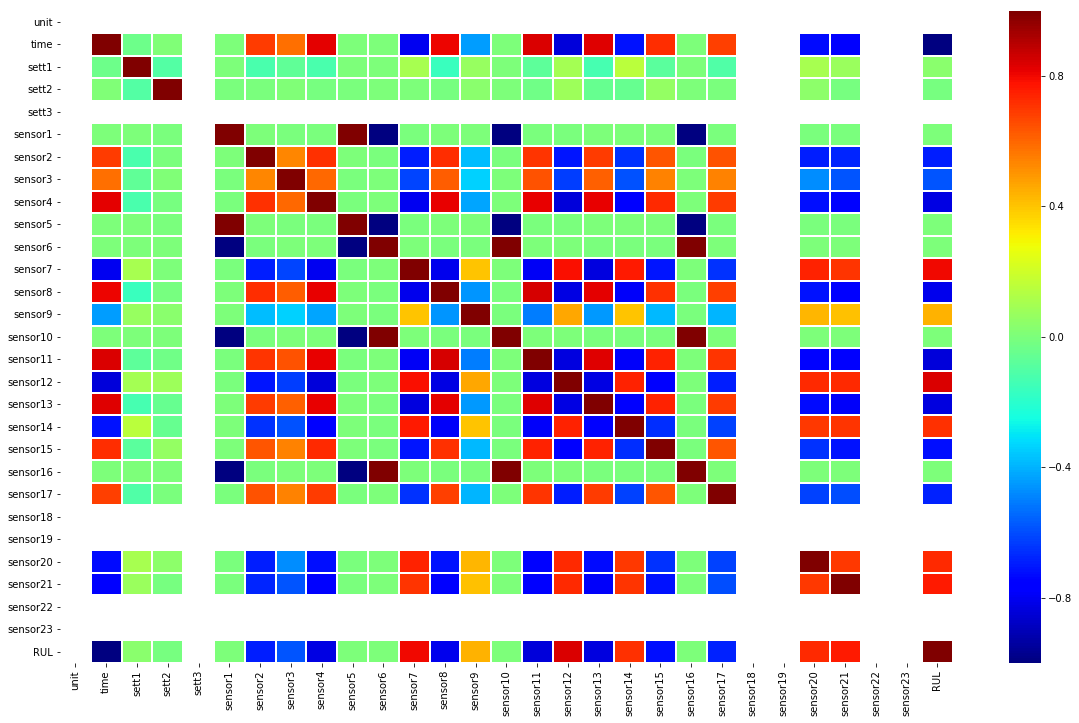

In [4]:
# import värikartta
import matplotlib.cm as cm

# korrelaatio / 1 moottori
korrelaatiot = data.loc[data['unit'] == 1].corr()

# värikartta (vaihtoehdot:https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps)
cmap = cm.get_cmap('jet') 

#kaavion koko
fig, ax = plt.subplots(figsize=(20,12))

# luodaan heatmap 'korrelaatiot' -taulusta
sns.heatmap(korrelaatiot,linewidths=1, cmap=cmap);

### Pudotetaan epäolennaiset sarakkeet

In [5]:
# Dropataan settingsit
data.drop(data.columns[[2, 3, 4]], axis=1, inplace=True) # inplace = False ei pudota lopullisesti pois

# annetaan sallittu keskihajonta
sallittu_keskihajonta = 0.8


# Tutkaillaan sensorien varianssia/keskihajontaa, pudotetaan pois ne joissa ei "tapahdu" tarpeeksi
# tehdään samalla lista "featureista", joita käytetään myöhemmin kouluttamisessa
import statistics as stats
features = []

print("Sensor | Keskihajonta  |  Varianssi")
for nro in range(1,24):
    if 'sensor'+str(nro) in data:
            kh = round(stats.stdev(data['sensor'+str(nro)]), 2)
            print("\n", str(nro), "      ", kh, "  ", 
            "\t",round(stats.variance(data['sensor'+str(nro)])),end=' ')
            if(kh < sallittu_keskihajonta) | (np.isnan(kh)):    # huom, ei np.nan
                data = data.drop('sensor'+str(nro), axis=1) # tarvitaan axis, huom    
                print("dropped")
            else:
                features = features + ['sensor'+str(nro)]

print("\n\n Valitut featuret: ", features)
data.head()

Sensor | Keskihajonta  |  Varianssi

 1        0.0    	 0.0 dropped

 2        0.5    	 0.0 dropped

 3        6.13    	 38.0 
 4        9.0    	 81.0 
 5        0.0    	 0.0 dropped

 6        0.0    	 0.0 dropped

 7        0.89    	 1.0 
 8        0.07    	 0.0 dropped

 9        22.08    	 488.0 
 10        0.0    	 0.0 dropped

 11        0.27    	 0.0 dropped

 12        0.74    	 1.0 dropped

 13        0.07    	 0.0 dropped

 14        19.08    	 364.0 
 15        0.04    	 0.0 dropped

 16        0.0    	 0.0 dropped

 17        1.41    	 2 
 18        0.0    	 0 dropped

 19        0.0    	 0.0 dropped

 20        0.18    	 0.0 dropped

 21        0.11    	 0.0 dropped

 22        nan    	 nan dropped

 23        nan    	 nan dropped


 Valitut featuret:  ['sensor3', 'sensor4', 'sensor7', 'sensor9', 'sensor14', 'sensor17']


,unit,time,sensor3,sensor4,sensor7,sensor9,sensor14,sensor17,RUL
0,1,1,1589.70,1400.60,554.36,9046.19,8138.62,392,191
1,1,2,1591.82,1403.14,553.75,9044.07,8131.49,392,190
2,1,3,1587.99,1404.20,554.26,9052.94,8133.23,390,189
3,1,4,1582.79,1401.87,554.45,9049.48,8133.83,392,188
4,1,5,1582.85,1406.22,554.00,9055.15,8133.80,393,187


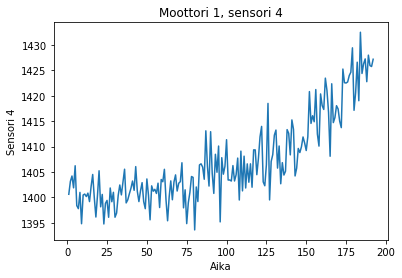

In [6]:
# Moottorin 1 kuvaaja sensorilta 4

moottori1 = data.loc[data['unit'] == 1]
plt.xlabel('Aika')
plt.ylabel('Sensori 4')
plt.title('Moottori 1, sensori 4')
plt.plot(moottori1['time'], moottori1['sensor4'])
plt.show()


### Lineaarinen regressio -ennuste


In [7]:
# Aiemmin valitut featuret ja 'time' -sarake
feature_cols = ['time'] + features
X = data[feature_cols]
y = data.RUL

# import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# tulostetaan leikkauspiste ja korrelaatiokertoimet
print("intercept: ", lm.intercept_, "\ncoef: ", lm.coef_)

# lasketaan ja tulostetaan "R-squared", selitysaste
print("R-squared: ", lm.score(X, y))

# pair the feature names with the coefficients
#print("zip ", zip(feature_cols, lm.coef_))

intercept:  -513.865383679 
coef:  [ -0.42867302  -0.72862876  -1.29344729  12.28727813  -0.31304916
   0.11126801  -3.09772066]
R-squared:  0.643951393565


In [8]:
# testidata valituilla featureilla
pred_test = test[feature_cols]

# tehdään ennuste 'preds' -taulukkoon
preds = lm.predict(pred_test)

# tehdään results-dataframe yhdistämällä 'preds'-taulukko testidataan
results = pd.concat([test,pd.DataFrame(preds, dtype=np.int)], axis=1)#, ignore_index=True)

# asetetaan labelit results -dataframeen, samat kuin aiemmin, mutta lisänä 'pred'
cols.append("pred")
results.columns = cols

# Tulosta kunkin moottorin viimeinen RUL
# ryhmittele data 'unit':in mukaan
grouped_by_unit = results.groupby(by=["unit"])

# hae kunkin 'unitin' viimeinen rivi "linear_preds" -tauluun
linear_preds = grouped_by_unit.last(col="time")

print("ennusteet: ", preds)

ennusteet:  [ 184.68966952  194.37752311  176.44486942 ...,   44.32369939   30.11121026
    0.95177317]


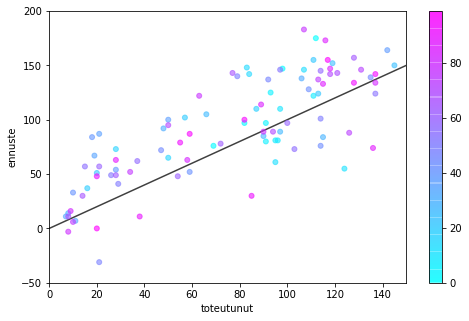

In [9]:
# lataa validointidata, aseta label 'RUL'
rul=pd.read_table('data/RUL_FD001.txt', names=['RUL'])


# Toteutunut / ennuste -kaavio
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

# labelit x ja y
plt.xlabel('toteutunut')
plt.ylabel('ennuste')

# piirrä scatter
arvot = plt.scatter(rul['RUL'], linear_preds['pred'], alpha=0.6, c = rul.index.values,s=25, cmap="cool")

# näyttää arvojen väripalkin (väri indeksinumeron mukaan)
plt.colorbar(arvot)

# suoran piirto
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
lims= np.array(lims)
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

# asetetaan kaavion rajat
ax.set_xlim(0,150)
ax.set_ylim(-50,200)
plt.show()

### Multi-layer Perceptron -ennuste

In [10]:
#http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler


# Lataa TESTING DATASET
test=pd.read_table('data/test_FD001.txt', sep=' ', names=cols)
# pudotetaan sarakkeet, joissa yksikin NaN arvo
test.dropna(axis=1, how='any', inplace=True)
# dropataan settingsit
test.drop(test.columns[[2, 3, 4]], axis=1, inplace=True)

# Sci-kit learnin StandardScalerin alustus "data":lla
sc = StandardScaler()
sc.fit(data)

# skaalataan traindata StandardScalerilla
traindata = sc.transform(data)

# skaalataan testdata valikoiduilla featureilla, koska StandardScaler vaatii 
# saman muodon kuin traindatassa, jolla "fitattiin" (lisätään toinen time-sarake, poistetaan myöhemmin)
feat = ['unit']+['time']+features+['time']
testdata = sc.transform(test[feat])

# muunnetaan DataFrameksi ja asetetaan otsikot
traindata = pd.DataFrame(traindata)
feat = ['unit']+['time']+features+['RUL']
traindata.columns = feat



# Valitse input-muuttujaksi kaikki sarakkeet paitsi EngineNo ja RUL, eli time ja sensorit
feat = ['time']+features
X = traindata[feat]

# Valitse target-muuttujaksi RUL
y = traindata['RUL']


# muunnetaan testdata DataFrameksi ja asetetaan otsikot
testdata = pd.DataFrame(testdata)
testdata.columns=['unit']+feat+['extracolumn']

In [11]:
# Multi-layer Perceptron regressor
#
# shuffle: shuffle samples in eact iteration, only sgd and adam
# alpha: L2 penalty (regularization)
# learning_rate_init: controls step-size in updating weights, only sgd or adam
# ‘invscaling’: gradually decreases the learning rate learning_rate_ at each time step ‘t’ 
#               using an inverse scaling exponent of ‘power_t’, sgd
# power_t : The exponent for inverse scaling learning rate when learning_rate is set to ‘invscaling’
#           Only when solver=’sgd’
# max_iter: adamilla ja sgd:llä epoch-lukumäärä (kuinka monta kertaa kutakin datapistettä käytetään)


# asetetaan parametrit
max_iter = 100
layers = (50,50)
alphas = 0.2
init = 0.1

# alusta mlp 
mlp = MLPRegressor(verbose=1, random_state=0, max_iter=max_iter, batch_size='auto', activation='relu',
                  learning_rate_init=init, solver='adam', alpha=alphas, hidden_layer_sizes=layers )
mlp.fit(X, y)


# tulosta pisteytys ja häviö
print("Training set score: %f" % mlp.score(X, y))
print("Training set loss: %f" % mlp.loss_)

Iteration 1, loss = 0.58408458
Iteration 2, loss = 0.22519109
Iteration 3, loss = 0.18402407
Iteration 4, loss = 0.16871023
Iteration 5, loss = 0.16230509
Iteration 6, loss = 0.15745219
Iteration 7, loss = 0.15560044
Iteration 8, loss = 0.15291086
Iteration 9, loss = 0.15144040
Iteration 10, loss = 0.15218133
Iteration 11, loss = 0.15270772
Iteration 12, loss = 0.15296715
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.714555
Training set loss: 0.152967


In [12]:
# tehdään väliaikainen dataframe, jossa ei unit-saraketta, eikä viimeistä väliaikaisesti luotua saraketta,
# jotta saadaan ennuste tehtyä saman muotoisella dataframella, johon mlp on "fitattu"
temptest = testdata.copy()
temptest.drop(['unit', 'extracolumn'], axis=1, inplace=True)
temptest = pd.DataFrame(temptest)

# tehdään ennuste, muotoillaan dataframeksi
result = pd.DataFrame(mlp.predict(temptest))

# yhdistetään testidata ja juuri saatu tulos-sarake
results_mlp = pd.DataFrame(pd.concat([testdata, result], axis=1))
results_mlp.rename(columns = {0:'RUL'}, inplace=True)   

# valitaan featuret takaisinskaalausta varten (oltava saman muotoinen data, kuin millä standardScaler "fitattu")
feat = ['unit'] + ['time'] + features + ['RUL']

# takaisinskaalaus
final_result = pd.DataFrame(sc.inverse_transform(results_mlp[feat]))
final_result.columns=feat

# Tulosta kunkin moottorin viimeinen RUL
# ryhmittele data 'unit':in mukaan
grouped_by_unit = final_result.groupby(by=["unit"])

# hae kunkin 'unitin' viimeinen rivi "linear_preds" -tauluun
mlp_preds = grouped_by_unit.last(col="time")

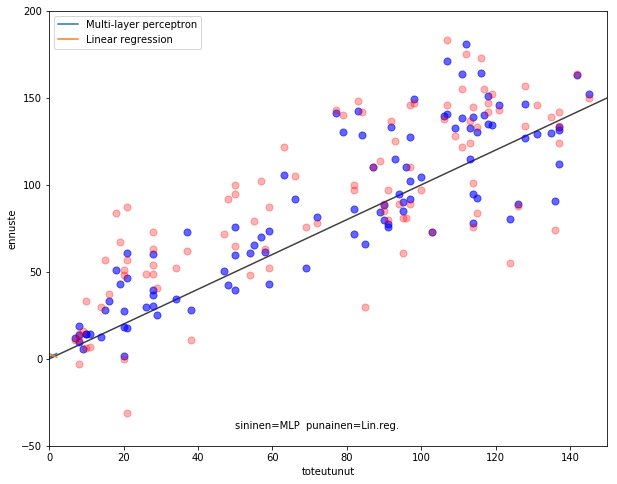

In [13]:
# lataa validointidata, aseta label 'RUL'
rul=pd.read_table('data/RUL_FD001.txt', names=['RUL'])


# Toteutunut / ennuste -kaavio
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.xlabel('toteutunut')
plt.ylabel('ennuste')

# MULTILAYER PERCEPTRON -scatter
plt.scatter(rul['RUL'], mlp_preds['RUL'], alpha=0.6, c = 'blue', s=50)

# LINEAARINEN REGRESSIO -vertailun vuoksi
arvotlin = plt.scatter(rul['RUL'], linear_preds['pred'], alpha=0.3, c = 'red', s=50)
plt.text(50, -40, "sininen=MLP  punainen=Lin.reg.")

#lisätään selitteet
line_up, = plt.plot([1,2,3], label='mlp')
line_down, = plt.plot([3,2,1], label='linreg')
plt.legend([line_up, line_down], ['Multi-layer perceptron', 'Linear regression'])


# suoran piirto
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
lims= np.array(lims)
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

# asetetaan kaavion rajat
ax.set_xlim(0,150)
ax.set_ylim(-50,200)
plt.show()

In [14]:
## huom, sama tehty ensin ilman skaalausta, mutta skaalaus paransi tulosta huomattavasti

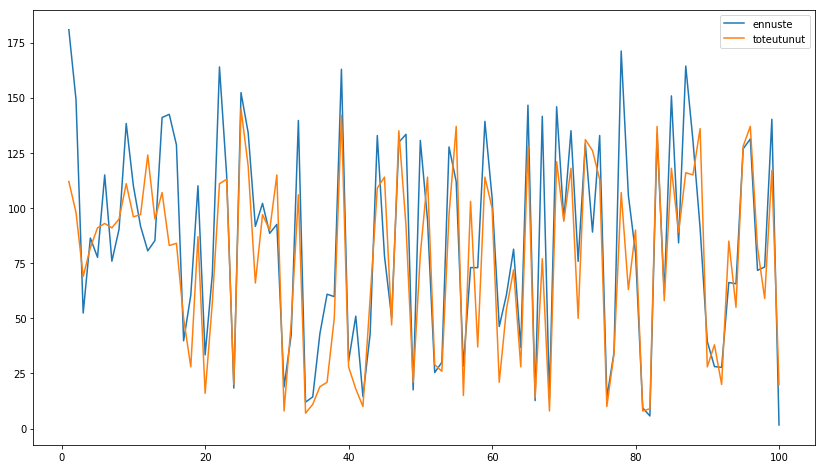

In [15]:
# kuvaaja, jossa vaaka-akselilla 'unit' ja pystyakselilla sekä ennuste että toteutunut elinikä
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

plt.plot(mlp_preds.index.values, mlp_preds['RUL'], label="ennuste")
plt.plot(mlp_preds.index.values, rul['RUL'], label="toteutunut")
#lisätään selitteet
plt.legend()
plt.show()